# MEFISTO application to spatial transcriptomics

This notebook demonstrates how MEFISTO can be applied to spatial transcriptomics using its interface for muon.

R vignette for this application [is available here](https://raw.githack.com/bioFAM/MEFISTO_tutorials/master/MEFISTO_ST.html#7_SessionInfo).

We use the `"Mouse Brain Serial Section 1 (Sagittal-Anterior)"` dataset [provided by 10X Genomics](https://support.10xgenomics.com/spatial-gene-expression/datasets).
The following files are used in this tutorial:

- _Feature / cell matrix HDF5 (filtered)_ (`filtered_feature_bc_matrix.h5`),
- _Spatial imaging data_ (`spatial.tar.gz`, has to be unarchived).

In [1]:
import psutil
import GPUtil

def get_system_metrics():
    # Get CPU usage
    cpu_usage = psutil.cpu_percent(interval=1)

    # Get total memory and memory used
    memory_info = psutil.virtual_memory()
    total_memory = memory_info.total / (1024 ** 3)  # Convert to GB
    memory_used = memory_info.used / (1024 ** 3)  # Convert to GB

    # Get GPU usage
    gpus = GPUtil.getGPUs()
    gpu_info = []
    for gpu in gpus:
        gpu_info.append({
            'id': gpu.id,
            'name': gpu.name,
            'load': gpu.load * 100,
            'memory_total': gpu.memoryTotal,
            'memory_used': gpu.memoryUsed,
            'temperature': gpu.temperature
        })

    return {
        'cpu_usage': cpu_usage,
        'total_memory': total_memory,
        'memory_used': memory_used,
        'gpu_info': gpu_info
    }


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

import muon as mu

# Get the metrics
metrics = get_system_metrics()

# Print the metrics
print(f"CPU Usage: {metrics['cpu_usage']}%")
print(f"Total Memory: {metrics['total_memory']:.2f} GB")
print(f"Memory Used: {metrics['memory_used']:.2f} GB")

for gpu in metrics['gpu_info']:
    print(f"GPU ID: {gpu['id']}")
    print(f"GPU Name: {gpu['name']}")
    print(f"GPU Load: {gpu['load']:.2f}%")
    print(f"GPU Memory Total: {gpu['memory_total']} MB")
    print(f"GPU Memory Used: {gpu['memory_used']} MB")
    print(f"GPU Temperature: {gpu['temperature']} C")

CPU Usage: 0.0%
Total Memory: 124.43 GB
Memory Used: 2.04 GB
GPU ID: 0
GPU Name: NVIDIA A10G
GPU Load: 4.00%
GPU Memory Total: 23028.0 MB
GPU Memory Used: 1.0 MB
GPU Temperature: 24.0 C


## Load data

In this notebook, we put the files mentioned above into the `data/ST/` directory.

In [3]:
datadir = "data/Spatial_CITE_Seq"

adata_ref = sc.read_visium(datadir)

# Paths to the data files
matrix_file = "data/Spatial/filtered_feature_bc_matrix/matrix.mtx.gz"
features_file = "data/Spatial/filtered_feature_bc_matrix/features.tsv.gz"
barcodes_file = "data/Spatial/filtered_feature_bc_matrix/barcodes.tsv.gz"

# adata_3.obs = pd.read_csv(features_file, header=None, sep='\t')

import anndata as ad
new_data = np.random.rand(4908, 18126)  # Replace with your actual data
adata = ad.AnnData(X=new_data)
adata.var = pd.read_csv(features_file, header=None, sep='\t')

# adata_3.var = pd.read_csv(barcodes_file, header=None, sep='\t')

# # Set the appropriate column names
# adata_3.obs.columns = ['gene_id', 'gene_name', 'feature_type']
# adata_3.var.columns = ['barcode']

# # Set the index
# adata_3.obs.set_index('gene_id', inplace=True)
# adata_3.var.set_index('barcode', inplace=True)

# import os
# import gzip
# import shutil

# # Directory containing the gz files
# directory = "data/Spatial/filtered_feature_bc_matrix"

# # Iterate over all files in the directory
# for filename in os.listdir(directory):
#     if filename.endswith(".gz"):
#         # Full path to the gz file
#         gz_file_path = os.path.join(directory, filename)
        
#         # Full path to the output file (removing .gz extension)
#         output_file_path = os.path.join(directory, filename[:-3])
        
#         # Unzip the gz file
#         with gzip.open(gz_file_path, 'rb') as f_in:
#             with open(output_file_path, 'wb') as f_out:
#                 shutil.copyfileobj(f_in, f_out)

# print("All gz files have been successfully unzipped.")


adata.obs = adata_ref.obs

adata_ref

adata.obsm = adata_ref.obsm
adata.uns = adata_ref.uns

adata.var

new_var_columns = [	'gene_ids', 'gene_name', 'feature_types']
adata.var.columns = new_var_columns
adata.var.set_index('gene_name', inplace=True)

from scipy.sparse import issparse
adata.var["gene_name"] = adata.var.index.tolist()
data_matrix = adata.X.toarray() if issparse(adata.X) else adata.X
adata.X = data_matrix

negative_values = data_matrix[data_matrix < 0]
print(f"Negative values: {negative_values}")
print(len(negative_values))

# Get the metrics
metrics = get_system_metrics()

# Print the metrics
print(f"CPU Usage: {metrics['cpu_usage']}%")
print(f"Total Memory: {metrics['total_memory']:.2f} GB")
print(f"Memory Used: {metrics['memory_used']:.2f} GB")

for gpu in metrics['gpu_info']:
    print(f"GPU ID: {gpu['id']}")
    print(f"GPU Name: {gpu['name']}")
    print(f"GPU Load: {gpu['load']:.2f}%")
    print(f"GPU Memory Total: {gpu['memory_total']} MB")
    print(f"GPU Memory Used: {gpu['memory_used']} MB")
    print(f"GPU Temperature: {gpu['temperature']} C")

/home/ssh-user/miniconda/envs/scGPT_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ssh-user/miniconda/envs/scGPT_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Negative values: []
0
CPU Usage: 0.1%
Total Memory: 124.43 GB
Memory Used: 3.34 GB
GPU ID: 0
GPU Name: NVIDIA A10G
GPU Load: 4.00%
GPU Memory Total: 23028.0 MB
GPU Memory Used: 1.0 MB
GPU Temperature: 24.0 C


## QC and preprocessing

We will follow [scanpy's spatial tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html) for the steps below.

/tmp/ipykernel_85052/2564472570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/tmp/ipykernel_85052/2564472570.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=4

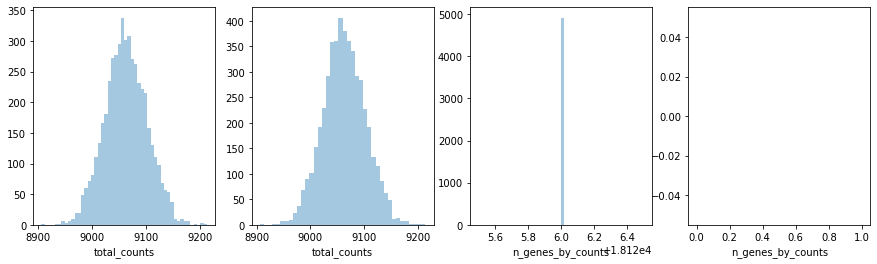

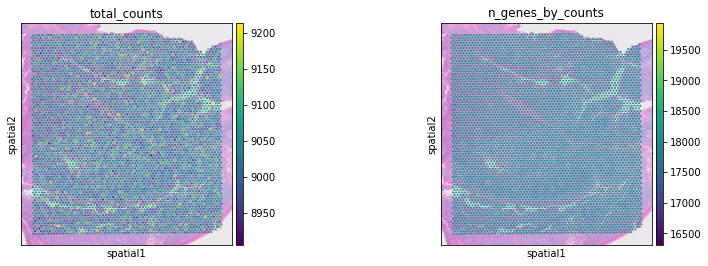

CPU Usage: 0.0%
Total Memory: 124.43 GB
Memory Used: 3.17 GB
GPU ID: 0
GPU Name: NVIDIA A10G
GPU Load: 4.00%
GPU Memory Total: 23028.0 MB
GPU Memory Used: 1.0 MB
GPU Temperature: 24.0 C


In [5]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

# mu.pp.filter_obs(adata, 'total_counts', lambda x: x < 50000)
# mu.pp.filter_obs(adata, 'pct_counts_mt', lambda x: x < 20)
# mu.pp.filter_var(adata, 'n_cells_by_counts', lambda x: x > 10)

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

#We will now add spatial covariates to the `.obs` slot so that we can refer to them easily later:

adata.obs = pd.concat([adata.obs, 
                       pd.DataFrame(adata.obsm["spatial"], columns=["imagerow", "imagecol"], index=adata.obs_names),
                      ], axis=1)

# Get the metrics
metrics = get_system_metrics()

# Print the metrics
print(f"CPU Usage: {metrics['cpu_usage']}%")
print(f"Total Memory: {metrics['total_memory']:.2f} GB")
print(f"Memory Used: {metrics['memory_used']:.2f} GB")

for gpu in metrics['gpu_info']:
    print(f"GPU ID: {gpu['id']}")
    print(f"GPU Name: {gpu['name']}")
    print(f"GPU Load: {gpu['load']:.2f}%")
    print(f"GPU Memory Total: {gpu['memory_total']} MB")
    print(f"GPU Memory Used: {gpu['memory_used']} MB")
    print(f"GPU Temperature: {gpu['temperature']} C")

## Train a MEFISTO model

In [6]:
# We use 1000 inducing points to learn spatial covariance patterns
n_inducing = 1000
metrics = get_system_metrics()
mu.tl.mofa(adata, n_factors=4, 
           smooth_covariate=["imagerow", "imagecol"],
           smooth_kwargs={
               "sparseGP": True, "frac_inducing": n_inducing/adata.n_obs, 
               "start_opt": 10, "opt_freq": 10,
           },
           outfile="models/mefisto_ST_CITE_2.hdf5",
           use_float32=True, seed=2021,
           quiet=False)
# Get the metrics
metrics = get_system_metrics()

# Print the metrics
print(f"CPU Usage: {metrics['cpu_usage']}%")
print(f"Total Memory: {metrics['total_memory']:.2f} GB")
print(f"Memory Used: {metrics['memory_used']:.2f} GB")

for gpu in metrics['gpu_info']:
    print(f"GPU ID: {gpu['id']}")
    print(f"GPU Name: {gpu['name']}")
    print(f"GPU Load: {gpu['load']:.2f}%")
    print(f"GPU Memory Total: {gpu['memory_total']} MB")
    print(f"GPU Memory Used: {gpu['memory_used']} MB")
    print(f"GPU Temperature: {gpu['temperature']} C")


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
use_float32 set to True: replacing float64 arrays by float32 arrays to speed up computations...

Loaded view='rna' group='group1' with N=4908 samples and D=1996 features...
Loaded view='prot' group='group1' with N=4908 samples and D=4 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weigh

KeyError: "Unable to synchronously open object (object 'data' doesn't exist)"

In [7]:
metrics = get_system_metrics()

# Print the metrics
print(f"CPU Usage: {metrics['cpu_usage']}%")
print(f"Total Memory: {metrics['total_memory']:.2f} GB")
print(f"Memory Used: {metrics['memory_used']:.2f} GB")

for gpu in metrics['gpu_info']:
    print(f"GPU ID: {gpu['id']}")
    print(f"GPU Name: {gpu['name']}")
    print(f"GPU Load: {gpu['load']:.2f}%")
    print(f"GPU Memory Total: {gpu['memory_total']} MB")
    print(f"GPU Memory Used: {gpu['memory_used']} MB")
    print(f"GPU Temperature: {gpu['temperature']} C")

CPU Usage: 0.1%
Total Memory: 124.43 GB
Memory Used: 5.06 GB
GPU ID: 0
GPU Name: NVIDIA A10G
GPU Load: 4.00%
GPU Memory Total: 23028.0 MB
GPU Memory Used: 1.0 MB
GPU Temperature: 25.0 C


## Downstream analyses

For some of the functionality below we will also use [mofax](https://github.com/bioFAM/mofax).

In [180]:
import mofax
m = mofax.mofa_model("models/mefisto_ST_CITE_2.hdf5")

### Factors correlation

First, we can take a look whether our factor are uncorrelated.

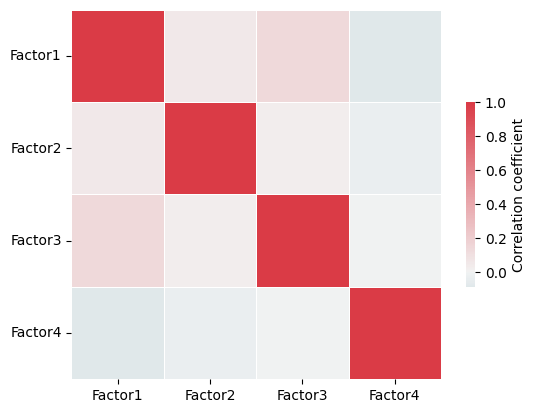

In [181]:
mofax.plot_factors_correlation(m);

### Spatial factors

We will then have a look at the spatial patterns that are captured by each factor. 

In [182]:
for i in range(4):
    adata.obs[f"Factor{i+1}"] = adata.obsm["X_mofa"][:,i]

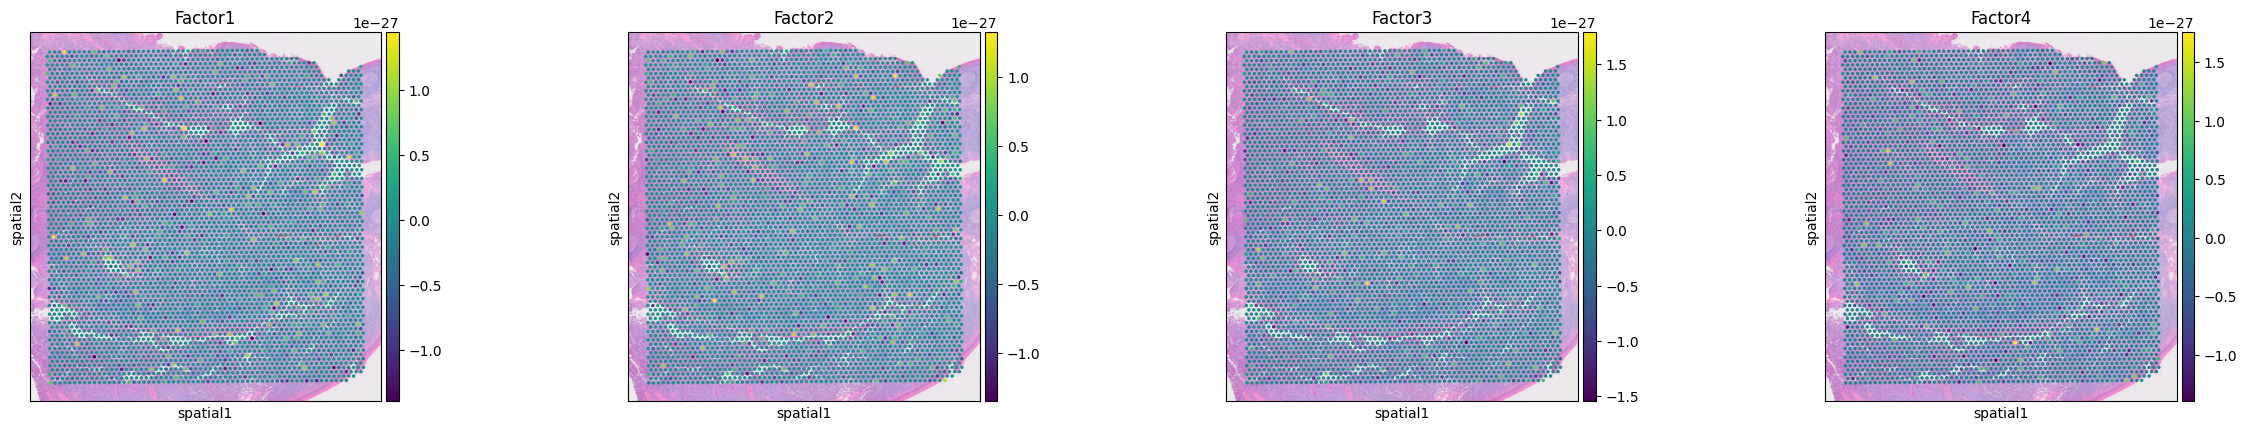

In [183]:
sc.pl.spatial(adata, img_key="hires", color=[f"Factor{i+1}" for i in range(4)])

### Smoothness of factors

All of this factors seem to capture spatial patterns of variation that seems to vary smoothly along space to some extent. We can take a look at the smoothness score inferred by the model.

<Axes: xlabel='Smoothness', ylabel='Factor'>

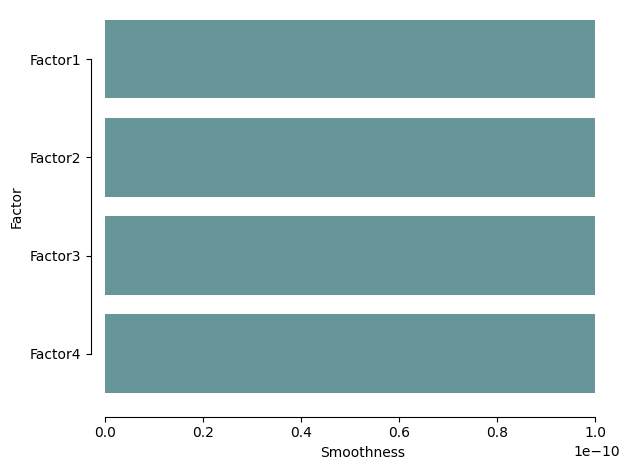

In [184]:
mofax.plot_smoothness(m)

### Weights

We will take `Factor4` as an example to show the spatial expression pattern for genes that have the highest weights for that factor.

In [203]:
top_features_f4 = m.get_top_features(factors="Factor3", n_features=2)
top_features_f4

array(['BORA', 'VEZF1', 'CD163', 'ACTA2'], dtype=object)

IndexError: index 8889 is out of bounds for axis 0 with size 4908

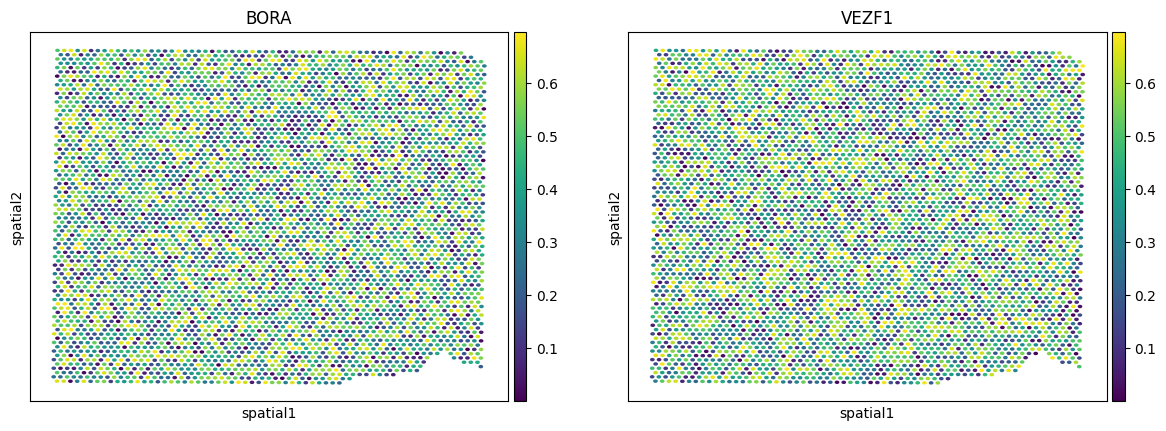

In [204]:
sc.pl.spatial(adata, img_key="hires", color=top_features_f4)

In [205]:
feature_names = adata.var_names
top_features_f4_indices = [feature_names.get_loc(feature) for feature in top_features_f4 if feature in feature_names]

In [206]:
top_features_f4_indices

[11640,
 14380,
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False])]

In [207]:
missing_features = [feature for feature in top_features_f4 if feature not in feature_names]
if missing_features:
    print(f"Missing features: {missing_features}")

In [208]:
missing_features

[]

IndexError: index 8889 is out of bounds for axis 0 with size 4908

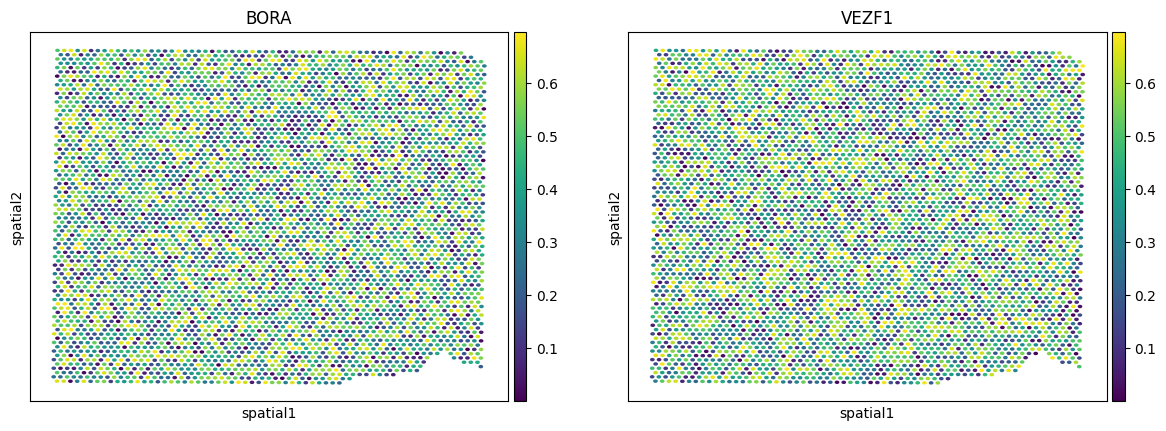

In [209]:
valid_features = [feature for feature in top_features_f4 if feature in feature_names]
sc.pl.spatial(adata, img_key="hires", color=valid_features)